# 군집화를 위한 고객 데이터 통합

## 재구매율에 사용한 고객데이터 통합

In [ ]:
prd = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data/prd.csv')
prd = prd.sort_values(['영수증번호','고객번호'])
prd['구매일자'] = pd.to_datetime(prd['구매일자'])
prd.loc[prd['구매일자']<'2015-01-01','구매분기'] = prd['구매일자'].dt.quarter
prd.loc[prd['구매일자']>='2015-01-01','구매분기'] = prd['구매일자'].dt.quarter + 4

In [ ]:
def user_total_products(prd):
  고객 = prd.groupby(['고객번호']).agg(구매상품수=('소분류코드','count')).reset_index()
  return 고객

In [ ]:
고객 = user_total_products(prd)

In [ ]:
def user_period(prd,고객):
  #고객 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data/고객.csv')
  고객.sort_values('고객번호')
  고객['첫구매'] = prd.groupby('고객번호').agg(첫구매 = ('구매일자','min')).values
  고객['마지막구매'] = prd.groupby('고객번호').agg(마지막구매 = ('구매일자','max')).values

  고객['첫구매'] = pd.to_datetime(고객['첫구매'])
  고객['마지막구매'] = pd.to_datetime(고객['마지막구매'])

  고객_기간 = 고객[['첫구매','마지막구매']]
  고객_기간_diff = 고객_기간.diff(axis=1)
  고객['첫-마지막'] = 고객_기간_diff['마지막구매']

  고객['첫-마지막'] = 고객['첫-마지막'].astype(str)
  고객['첫-마지막'] = 고객['첫-마지막'].str.split(' ').str[0]
  고객['첫-마지막'] = 고객['첫-마지막'].astype(int)

  고객.drop(['첫구매','마지막구매'], axis=1, inplace=True)

  return 고객

In [ ]:
고객 = user_period(prd,고객)

In [ ]:
def user_mean_days_since_prior(prd,고객):
  #고객 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data/고객.csv')
  prd.sort_values('구매일자',inplace=True)

  고객_구매일자 = pd.DataFrame(prd.groupby(['고객번호'])['구매일자'].unique())
  고객_구매일자.reset_index(inplace=True)

  index = []
  data = []
  for i,j in enumerate(고객_구매일자['구매일자']):
    index.append(i)
    data.append(j)

  sep = pd.DataFrame(data = data,index = index)
  sep.replace(np.nan,'2000-01-01',inplace=True)
  
  period = sep.diff(axis=1)
  period = period.astype(str)
  for i in range(len(period.columns)):
    period[i] = period[i].str.split(' ').str[0]

  period.replace('NaT',0,inplace=True)
  period = period.astype(int)
  for i in range(len(period.columns)):
    period[i] = np.where(period[i]<=0,np.nan,period[i])

  period_mean = period.mean(axis=1, skipna=True)

  고객['구매간격'] = period_mean

  return 고객

In [ ]:
고객 = user_mean_days_since_prior(prd,고객)

In [ ]:
def user_orders(prd,고객):
  #고객 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data/고객.csv')

  영수증고유 = pd.DataFrame(prd[['고객번호','영수증번호']].value_counts().reset_index())
  영수증개수 = 영수증고유.groupby('고객번호')[['영수증번호']].count().reset_index()

  영수증개수.sort_values('고객번호',inplace=True)
  고객['구매건수'] = 영수증개수['영수증번호']

  return 고객

In [ ]:
고객 = user_orders(prd,고객)

In [ ]:
고객

,고객번호,구매상품수,첫-마지막,구매간격,구매건수
0,1,1057,721,3.121212,681
1,2,1116,726,2.547368,676
2,3,1191,724,1.832911,490
3,4,930,727,2.806950,533
4,5,719,725,3.072034,426
...,...,...,...,...,...
19378,19379,584,461,2.114679,366
19379,19380,440,385,2.655172,232
19380,19381,805,363,1.824121,402
19381,19382,906,344,1.694581,435


In [ ]:
항목수 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data4/각고객의구매한상품항목수.csv')
항목평균 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data4/각고객의구매당평균항목수.csv')

In [ ]:
고객['구매항목수'] = 항목수['각고객의구매한상품항목수']

In [ ]:
고객['구매_평균항목수'] = 항목평균['각고객의구매당평균항목수']

In [ ]:
고객

,고객번호,구매상품수,첫-마지막,구매간격,구매건수,구매항목수,구매_평균항목수
0,1,1057,721,3.121212,681,255,1.552129
1,2,1116,726,2.547368,676,140,1.650888
2,3,1191,724,1.832911,490,161,2.430612
3,4,930,727,2.806950,533,254,1.744841
4,5,719,725,3.072034,426,80,1.687793
...,...,...,...,...,...,...,...
19378,19379,584,461,2.114679,366,133,1.595628
19379,19380,440,385,2.655172,232,107,1.896552
19380,19381,805,363,1.824121,402,281,2.002488
19381,19382,906,344,1.694581,435,307,2.082759


## 재구매율 컬럼

In [ ]:
재구매율 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data4/고객예측_test.csv')

In [ ]:
재구매율

,Unnamed: 0,고객번호,구매상품수,첫-마지막,구매간격,구매건수,구매항목수,구매_평균항목수,label
0,0,1,1057.0,622.0,3.117754,681.0,290,1.552531,0.082308
1,1,2,1116.0,634.0,2.556618,676.0,177,1.650347,0.106631
2,2,3,1191.0,627.0,1.831400,490.0,194,2.418215,0.280437
3,3,4,930.0,635.0,2.816857,533.0,293,1.756036,0.027957
4,4,5,719.0,504.0,2.513663,426.0,100,1.688143,0.123783
...,...,...,...,...,...,...,...,...,...
19378,19378,19379,584.0,373.0,2.106458,366.0,173,1.589168,0.095890
19379,19379,19380,440.0,293.0,3.506188,232.0,144,1.843337,0.050000
19380,19380,19381,805.0,270.0,1.857261,402.0,361,2.074253,0.029814
19381,19381,19382,906.0,250.0,1.729108,435.0,404,2.190977,0.034216


In [ ]:
고객['재구매율'] = 재구매율['label']

In [ ]:
고객

,고객번호,구매상품수,첫-마지막,구매간격,구매건수,구매항목수,구매_평균항목수,재구매율
0,1,1057,721,3.121212,681,255,1.552129,0.082308
1,2,1116,726,2.547368,676,140,1.650888,0.106631
2,3,1191,724,1.832911,490,161,2.430612,0.280437
3,4,930,727,2.806950,533,254,1.744841,0.027957
4,5,719,725,3.072034,426,80,1.687793,0.123783
...,...,...,...,...,...,...,...,...
19378,19379,584,461,2.114679,366,133,1.595628,0.095890
19379,19380,440,385,2.655172,232,107,1.896552,0.050000
19380,19381,805,363,1.824121,402,281,2.002488,0.029814
19381,19382,906,344,1.694581,435,307,2.082759,0.034216


## 고객 성별

In [ ]:
고객데모 = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data4/고객데모14.csv의 사본')

In [ ]:
고객데모['성별'] = np.where(고객데모['성별']=='M', 1,2)

## 분기기준 구매금액 평균

In [ ]:
고객_구매금액_분기평균 = 고객데모[['고객번호','14_1분기_구매금액','14_2분기_구매금액','14_3분기_구매금액','14_4분기_구매금액','15_1분기_구매금액','15_2분기_구매금액','15_3분기_구매금액','15_4분기_구매금액']]

In [ ]:
고객_구매금액_분기평균['분기평균'] = 고객_구매금액_분기평균.iloc[:,1:].mean(axis=1)

<ipython-input-62-34163398170a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  고객_구매금액_분기평균['분기평균'] = 고객_구매금액_분기평균.iloc[:,1:].mean(axis=1)


## 분기기준 영수증 개수 평균

In [ ]:
고객_영수증_분기평균 = 고객데모[['고객번호','14년도_1분기_영수증갯수', '14년도_2분기_영수증갯수', '14년도_3분기_영수증갯수', '14년도_4분기_영수증갯수', '15년도_1분기_영수증갯수', '15년도_2분기_영수증갯수', '15년도_3분기_영수증갯수', '15년도_4분기_영수증갯수']]

In [ ]:
고객_영수증_분기평균['분기평균'] = 고객_영수증_분기평균.iloc[:,1:].mean(axis=1)

<ipython-input-69-5e4c3e166266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  고객_영수증_분기평균['분기평균'] = 고객_영수증_분기평균.iloc[:,1:].mean(axis=1)


## 연령대 코드화

In [ ]:
categories = ['60세이상', '55세~59세', '50세~54세', '45세~49세', '40세~44세', '35세~39세',
       '30세~34세', '25세~29세', '20세~24세', '19세이하']
codes = [0,1,2,3,4,5,6,7,8,9]
cat = {}
for i,j in zip(categories,codes):
  cat[i]=j

In [ ]:
고객데모['연령대_n'] = 고객데모['연령대']

In [ ]:
고객데모['연령대_n'].replace(cat,inplace=True)

## 최다구매물품명 컬럼


In [ ]:
최대구매 = 고객데모[['고객번호','최다구매물품명']]

In [ ]:
소분류 = pd.DataFrame(prd[['소분류명','소분류코드']].value_counts().reset_index())

In [ ]:
소분류_li = {}
for i,j in zip(소분류['소분류명'].values, 소분류['소분류코드'].values):
  소분류_li[i] = j

In [ ]:
최대구매['소분류코드'] = 최대구매['최다구매물품명']

<ipython-input-42-31fd61c97be9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  최대구매['소분류코드'] = 최대구매['최다구매물품명']


In [ ]:
최대구매['소분류코드'].replace(소분류_li, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## RFM

In [ ]:
rfm = pd.read_csv('/content/drive/MyDrive/데이터강의/project_2차/data/14+15년도_RFM.csv')

### 고객 데이터에 추가

In [ ]:
고객.insert(1,'성별',고객데모['성별'])
고객.insert(2,'연령대',고객데모['연령대_n'])
고객.insert(3,'거주지역',고객데모['거주지역'])
고객['영수증평균개수'] = 고객_영수증_분기평균['분기평균']
고객['구매금액평균'] = 고객_구매금액_분기평균['분기평균']
고객['최다구매물품'] = 최대구매['소분류코드']
고객['rfm'] = rfm['RFM']
고객['총구매금액'] = rfm['총구매금액']
고객['총영수증개수'] = rfm['영수증개수']

### 데이터 정제

In [ ]:
고객['거주지역'].fillna(999,inplace=True)
고객['구매간격'].fillna(0,inplace=True)

# 군집화

## 군집화를 위한 데이터 전처리
- MinMax

```
고객mm데이터 만들기

- 재구매율을 제외한 나머지 컬럼 스케일링
- 연령,거주지역,성별은 군집화에 너무 큰 특색을 만드므로 후에 제거
``` 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
고객_mm = mm.fit_transform(고객[['구매상품수', '첫-마지막', '구매건수', '구매항목수','영수증평균개수','구매금액평균','구매간격','구매_평균항목수', '총구매금액', '총영수증개수', '최다구매물품']])
pd.DataFrame(고객_mm)

,0,1,2,3,4,5,6,7,8,9,10
0,0.102634,0.989026,0.256895,0.270789,0.256895,0.023805,0.008413,0.018404,0.023805,0.256895,0.812697
1,0.108368,0.995885,0.255006,0.148188,0.255006,0.027959,0.006866,0.021696,0.027959,0.255006,0.671719
2,0.115657,0.993141,0.184737,0.170576,0.184737,0.000882,0.004940,0.047687,0.000882,0.184737,0.714898
3,0.090291,0.997257,0.200982,0.269723,0.200982,0.004669,0.007566,0.024828,0.004669,0.200982,0.812697
4,0.069783,0.994513,0.160559,0.084222,0.160559,0.003702,0.008280,0.022926,0.003702,0.160559,0.689448
...,...,...,...,...,...,...,...,...,...,...,...
19378,0.056662,0.632373,0.137892,0.140725,0.137892,0.001614,0.005700,0.019854,0.001614,0.137892,0.913926
19379,0.042667,0.528121,0.087269,0.113006,0.087269,0.001091,0.007157,0.029885,0.001091,0.087269,0.871032
19380,0.078142,0.497942,0.151492,0.298507,0.151492,0.001687,0.004917,0.033416,0.001687,0.151492,0.265656
19381,0.087958,0.471879,0.163959,0.326226,0.163959,0.001228,0.004568,0.036092,0.001228,0.163959,0.408636


In [ ]:
고객_mm = pd.DataFrame(고객_mm, columns = ['구매상품수', '첫-마지막', '구매건수', '구매항목수','영수증평균개수','구매금액평균','구매간격','구매_평균항목수', '총구매금액', '총영수증개수', '최다구매물품'])

In [ ]:
고객_mm['재구매율'] = 고객['재구매율']

In [ ]:
고객_mm

,구매상품수,첫-마지막,구매건수,구매항목수,영수증평균개수,구매금액평균,구매간격,구매_평균항목수,총구매금액,총영수증개수,최다구매물품,재구매율
0,0.102634,0.989026,0.256895,0.270789,0.256895,0.023805,0.008413,0.018404,0.023805,0.256895,0.812697,0.082308
1,0.108368,0.995885,0.255006,0.148188,0.255006,0.027959,0.006866,0.021696,0.027959,0.255006,0.671719,0.106631
2,0.115657,0.993141,0.184737,0.170576,0.184737,0.000882,0.004940,0.047687,0.000882,0.184737,0.714898,0.280437
3,0.090291,0.997257,0.200982,0.269723,0.200982,0.004669,0.007566,0.024828,0.004669,0.200982,0.812697,0.027957
4,0.069783,0.994513,0.160559,0.084222,0.160559,0.003702,0.008280,0.022926,0.003702,0.160559,0.689448,0.123783
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,0.056662,0.632373,0.137892,0.140725,0.137892,0.001614,0.005700,0.019854,0.001614,0.137892,0.913926,0.095890
19379,0.042667,0.528121,0.087269,0.113006,0.087269,0.001091,0.007157,0.029885,0.001091,0.087269,0.871032,0.050000
19380,0.078142,0.497942,0.151492,0.298507,0.151492,0.001687,0.004917,0.033416,0.001687,0.151492,0.265656,0.029814
19381,0.087958,0.471879,0.163959,0.326226,0.163959,0.001228,0.004568,0.036092,0.001228,0.163959,0.408636,0.034216


## K_Means

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter = 300, random_state=0)
kmeans.fit(고객_mm)
#------------------------------#

고객_mm['cluster'] = kmeans.labels_
print(고객_mm['cluster'].value_counts())

1    6795
0    6301
2    6287
Name: cluster, dtype: int64


### 시각화를 위한 차원 축소

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

X = 고객_mm.iloc[:,:-1]

#객체
pca = PCA(n_components=3)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.2779995 , -0.07353309,  0.09577063],
       [-0.14053762, -0.19012583,  0.12177113],
       [-0.18627459, -0.20824306,  0.01213758],
       ...,
       [ 0.2587817 , -0.14059567, -0.16881961],
       [ 0.11761806, -0.10462801, -0.15264333],
       [-0.37177879, -0.37527932, -0.29779994]])

In [ ]:
pca.explained_variance_ratio_

array([0.56053452, 0.2746218 , 0.09449998])

In [ ]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = 고객_mm['cluster']

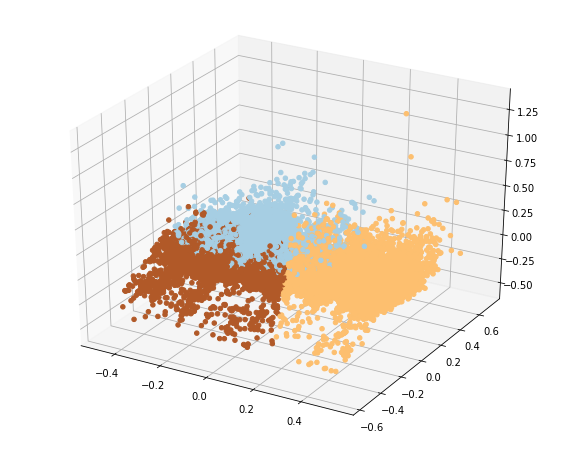

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=pca_df['cluster'], marker='o', cmap='Paired', alpha=1)

### 실루엣 계수 확인

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

고객_mm['silhouette_coeff'] = silhouette_samples(고객_mm.iloc[:,:-1],고객_mm['cluster'])
score = silhouette_score(고객_mm.iloc[:,:-1],고객_mm['cluster'])
#---------------------------------------#
print('평균 실루엣 score:',score)
고객_mm

평균 실루엣 score: 0.7521851837143642


,구매상품수,첫-마지막,구매건수,구매항목수,영수증평균개수,구매금액평균,구매간격,구매_평균항목수,총구매금액,총영수증개수,최다구매물품,재구매율,cluster,silhouette_coeff
0,0.102634,0.989026,0.256895,0.270789,0.256895,0.023805,0.008413,0.018404,0.023805,0.256895,0.812697,0.082308,2,0.799418
1,0.108368,0.995885,0.255006,0.148188,0.255006,0.027959,0.006866,0.021696,0.027959,0.255006,0.671719,0.106631,2,0.810418
2,0.115657,0.993141,0.184737,0.170576,0.184737,0.000882,0.004940,0.047687,0.000882,0.184737,0.714898,0.280437,2,0.766502
3,0.090291,0.997257,0.200982,0.269723,0.200982,0.004669,0.007566,0.024828,0.004669,0.200982,0.812697,0.027957,2,0.808103
4,0.069783,0.994513,0.160559,0.084222,0.160559,0.003702,0.008280,0.022926,0.003702,0.160559,0.689448,0.123783,2,0.801315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,0.056662,0.632373,0.137892,0.140725,0.137892,0.001614,0.005700,0.019854,0.001614,0.137892,0.913926,0.095890,2,0.648435
19379,0.042667,0.528121,0.087269,0.113006,0.087269,0.001091,0.007157,0.029885,0.001091,0.087269,0.871032,0.050000,2,0.584582
19380,0.078142,0.497942,0.151492,0.298507,0.151492,0.001687,0.004917,0.033416,0.001687,0.151492,0.265656,0.029814,1,0.524729
19381,0.087958,0.471879,0.163959,0.326226,0.163959,0.001228,0.004568,0.036092,0.001228,0.163959,0.408636,0.034216,1,0.475172


### 실루엣 계수/엘보우 군집2~9까지 확인

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


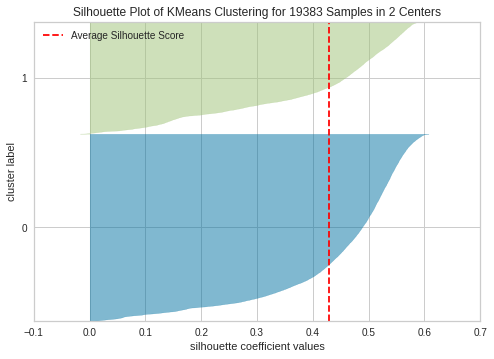

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


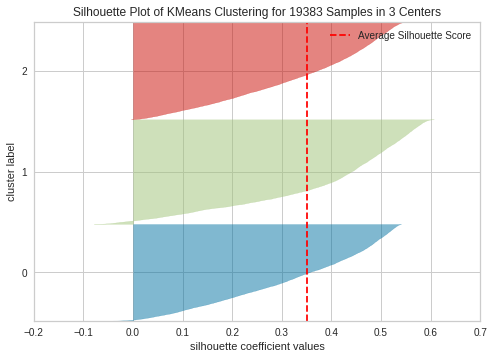

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


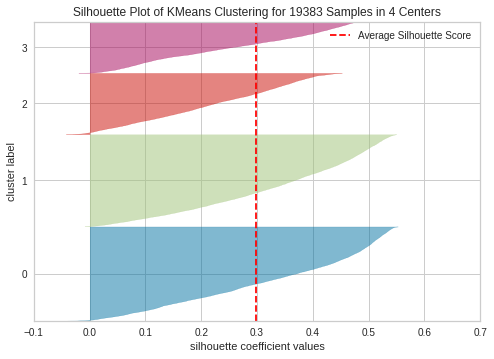

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


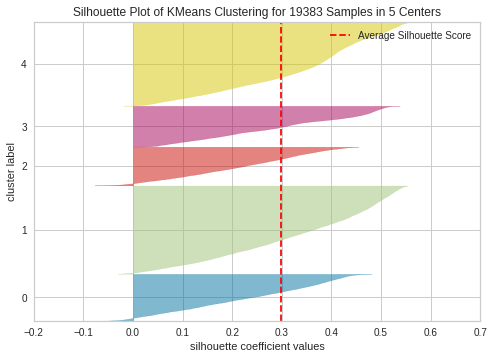

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


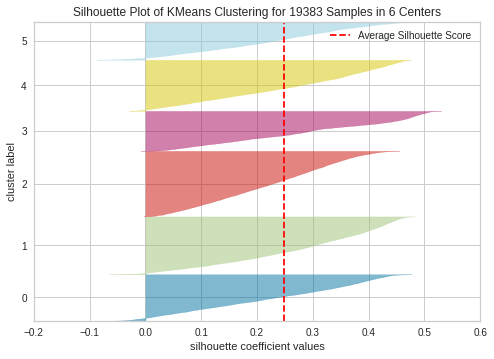

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


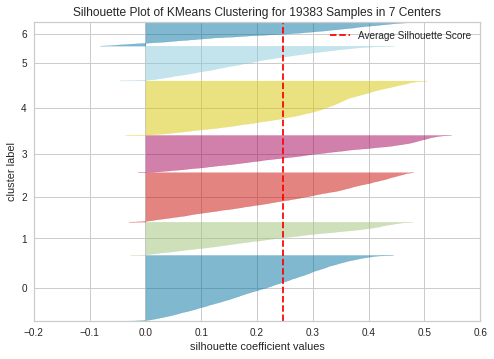

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


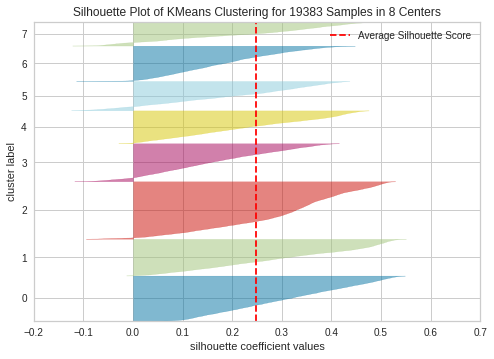

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


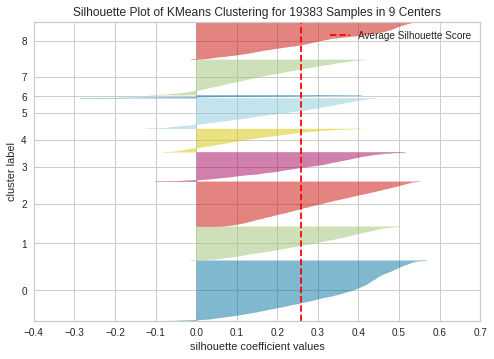

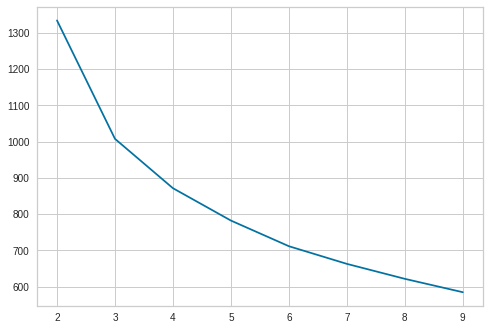

In [ ]:
from sklearn.cluster import KMeans
SSE = []
for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(고객_mm.iloc[:,:-1])
  SSE.append(kmeans.inertia_)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(고객_mm.iloc[:,:-1])      
  visualizer.show()

plt.plot([i for i in range(2,10)],SSE)

## Mean_Shift

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(고객_mm.iloc[:,:-2])
bandwidth

0.34046558820835465

In [ ]:
from sklearn.cluster import MeanShift

고객_mm['ms'] = MeanShift(bandwidth=bandwidth).fit_predict(고객_mm.iloc[:,:-2])

In [ ]:
고객_mm['ms'].value_counts()

0     12011
1      7212
2        80
7        28
4        14
12       11
5         9
10        8
3         4
11        3
6         1
8         1
9         1
Name: ms, dtype: int64

In [ ]:
score = silhouette_score(고객_mm.iloc[:,:-3],고객_mm['ms'])

print('MeanShift---------------')
print('평균 실루엣 score:',score)

MeanShift---------------
평균 실루엣 score: 0.40623420236065355


### 차원축소, 시각화

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

X = 고객_mm.iloc[:,:-3]

#객체
pca = PCA(n_components=3)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.2779995 , -0.07353309,  0.09577063],
       [-0.14053762, -0.19012583,  0.12177113],
       [-0.18627459, -0.20824306,  0.01213758],
       ...,
       [ 0.2587817 , -0.14059567, -0.16881961],
       [ 0.11761806, -0.10462801, -0.15264333],
       [-0.37177879, -0.37527932, -0.29779994]])

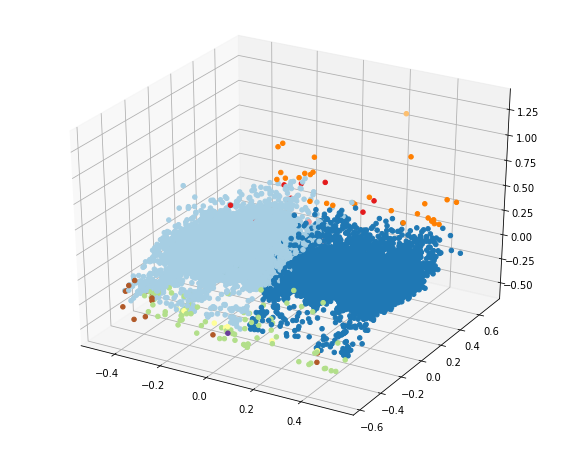

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=고객_mm['ms'], marker='o', cmap='Paired', alpha=1)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.4, min_samples=8, metric='euclidean')
고객_mm['dbscan'] = dbscan.fit_predict(고객_mm.iloc[:,:-4])

In [ ]:
고객_mm['dbscan'].value_counts()

 0    19374
-1        9
Name: dbscan, dtype: int64

In [ ]:
score = silhouette_score(고객_mm.iloc[:,:-4],고객_mm['dbscan'])

print('DBSCAN---------------')
print('평균 실루엣 score:',score)

DBSCAN---------------
평균 실루엣 score: 0.638133257071652
